In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.shape

(891, 12)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [8]:
numerical_data = df.drop(['Survived', 'PassengerId'], axis=1).select_dtypes(['int64', 'float64'])
categorical_data = df.select_dtypes(['object'])

In [9]:
numerical_data.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.00,1,0,7.25
1,1,38.00,1,0,71.28
2,3,26.00,0,0,7.92
3,1,35.00,1,0,53.10
4,3,35.00,0,0,8.05


In [10]:
categorical_data.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [11]:
print(categorical_data.shape, numerical_data.shape)

(891, 5) (891, 5)


In [12]:
numerical_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.00,714.00,891.00,891.00,891.00
mean,2.31,29.70,0.52,0.38,32.20
std,0.84,14.53,1.10,0.81,49.69
min,1.00,0.42,0.00,0.00,0.00
25%,2.00,20.12,0.00,0.00,7.91
50%,3.00,28.00,0.00,0.00,14.45
75%,3.00,38.00,1.00,0.00,31.00
max,3.00,80.00,8.00,6.00,512.33


# Numerical data. EDA 

In [14]:
std = StandardScaler()
std_numerical_data = pd.DataFrame(std.fit_transform(numerical_data), columns=numerical_data.columns)

In [15]:
std_numerical_data.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.83,-0.53,0.43,-0.47,-0.50
1,-1.57,0.57,0.43,-0.47,0.79
2,0.83,-0.25,-0.47,-0.47,-0.49
3,-1.57,0.37,0.43,-0.47,0.42
4,0.83,0.37,-0.47,-0.47,-0.49


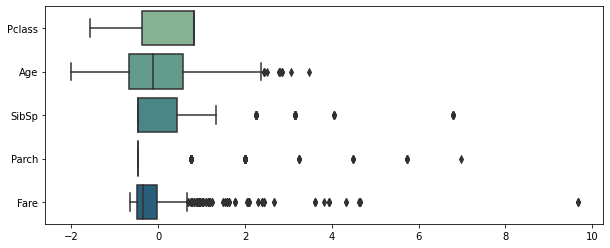

In [127]:
plt.figure(figsize=(10, 4))
sns.set_palette(sns.color_palette("crest"))
sns.boxplot(data=std_numerical_data, orient='horizontal');

There is a problem with outliers.

**Generaly there are three options to handle outliers:** 

1. Remove them. 
2. Add additional feature that indicates whether records has outliers. 
3. Use log to dicrease the influence of.

### Age feature analysis

In [17]:
age_attribute = numerical_data.Age

In [18]:
age_attribute.describe()

count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64

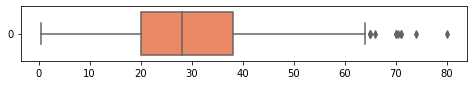

In [94]:
plt.figure(figsize=(8, 1))
sns.boxplot(data=age_attribute, orient='horizontal', color='coral');

There are some outliers. I think the best solution will be to use IQR * 1.5 to manage them.

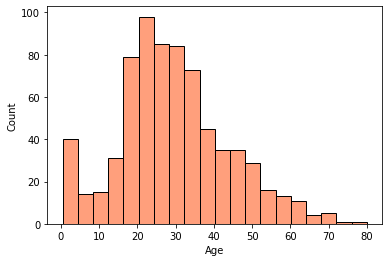

In [117]:
sns.histplot(age_attribute, color='coral');

In [21]:
k2_score, pvalue = stats.normaltest(age_attribute.fillna(age_attribute.median()))

This function tests the null hypothesis that a sample comes from a normal distribution. 

In [22]:
alpha = 0.05

In [23]:
print(k2_score, pvalue)

53.46581133311897 2.454972229498001e-12


In [24]:
if pvalue < alpha:
    print("The null hypothesis can be rejected. We can assume that this data isn't normaly distributed.")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected. We can assume that this data isn't normaly distributed.


The age data distributed pretty close to normal distribution so I can assume that if we get rid of outliers it will be normaly distributed

In [25]:
IQR = age_attribute.quantile(0.75) - age_attribute.quantile(0.25)

In [26]:
threshold = IQR * 1.5

In [27]:
lower_bound = age_attribute.quantile(0.25) - threshold
upper_bound = age_attribute.quantile(0.75) + threshold
age_attribute_without_outliers = age_attribute[(age_attribute > lower_bound) & (age_attribute < upper_bound)]

In [28]:
print(age_attribute.shape, age_attribute_without_outliers.shape)

(891,) (703,)


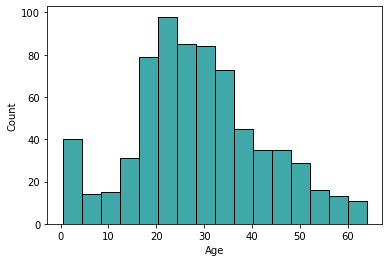

In [29]:
sns.histplot(age_attribute_without_outliers, color='darkcyan');

In [30]:
def check_normal_distribution(data):
    k2_score, pvalue = stats.normaltest(data.fillna(data.median()))
    alpha = 0.05
    
    print('Alpha level: ' + str(alpha))
    if pvalue < alpha:
        print("The null hypothesis can be rejected. We can assume that this data isn't normaly distributed.")
    else:
        print("The null hypothesis cannot be rejected. The data is normaly distributed")

In [31]:
check_normal_distribution(age_attribute_without_outliers)

Alpha level: 0.05
The null hypothesis cannot be rejected. The data is normaly distributed


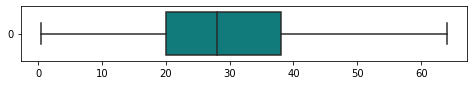

In [93]:
plt.figure(figsize=(8, 1))
sns.boxplot(data=age_attribute_without_outliers, orient='horizontal', color='darkcyan');

In [54]:
age_attribute.shape[0] - age_attribute_without_outliers.shape[0]

188

Using first strategy we lose a lot of data. So it will be better to use second or third stategy

### Pclass feature analysis

In [33]:
pclass_attribute = numerical_data.Pclass

In [34]:
pclass_attribute.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [35]:
pclass_attribute.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

I would say that is categorical ordered data, because it represents ticket class (1 - Upper, 2 - Middle, 3 - Lower)

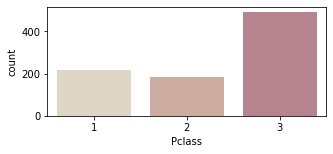

In [118]:
plt.figure(figsize=(5, 2))
sns.set_palette(sns.color_palette("ch:s=-.2,r=.6"))
sns.countplot(x=pclass_attribute);

### SibSp feature analysis

Number of siblings / spouses aboard the Titanic

In [55]:
sib_sp_attribute = numerical_data.SibSp

In [56]:
sib_sp_attribute.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [57]:
sib_sp_attribute.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

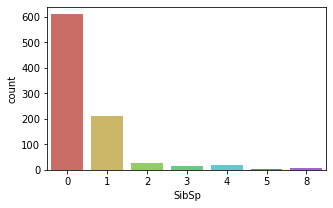

In [102]:
plt.figure(figsize=(5, 3))
sns.countplot(x=sib_sp_attribute);

In [59]:
Q3 = sib_sp_attribute.quantile(0.75)
Q1 = sib_sp_attribute.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [60]:
lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

In [65]:
sib_sp_attribute.shape

(891,)

In [63]:
sib_sp_attribute_without_outliers = sib_sp_attribute[(sib_sp_attribute > lower_bound) & (sib_sp_attribute < upper_bound)]

In [92]:
loss = sib_sp_attribute.shape[0] - sib_sp_attribute_without_outliers.shape[0]
loss

46

In [67]:
upper_bound

2.5

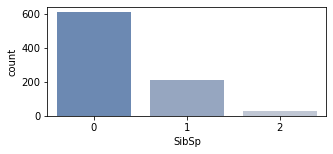

In [115]:
plt.figure(figsize=(5, 2))
sns.set_palette(sns.color_palette("vlag", 8))
sns.countplot(x=sib_sp_attribute_without_outliers);

I will add new feature which will indicate whether it is outlier or not

### Parch 

Number of parents / children aboard the Titanic

In [96]:
parch_attribute = numerical_data.Parch

In [98]:
parch_attribute.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

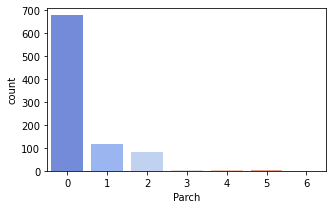

In [121]:
plt.figure(figsize=(5, 3))
sns.set_palette(sns.color_palette("coolwarm", 7))
sns.countplot(x=parch_attribute);

In [124]:
Q3 = parch_attribute.quantile(0.75)
Q1 = parch_attribute.quantile(0.25)
IQR = Q3 - Q1
IQR

0.0

### Fare feature analysis

Passenger fare

In [128]:
fare_attribute = numerical_data.Fare

In [ ]:
fare_attribute.